# <font color='blue'>Chapter 8. Correlation</font>

## <font color='blue'>Problem</font>

### Convolution and Cross-Correlation in image processing 
https://www.youtube.com/watch?v=MQm6ZP1F6ms
### 淺談時間序列預測
https://vocus.cc/article/620f901cfd897800015e49be

### <font color='green'>Next: Fourier Transform</font>

### <font color='green'> A radar example</font>

<div>
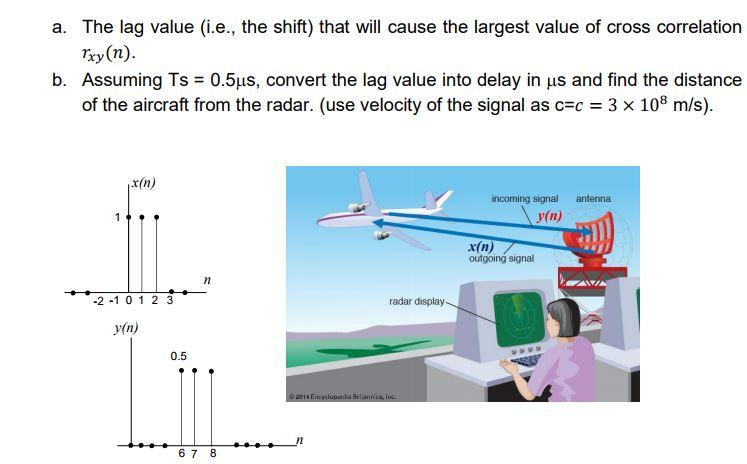
</div>

* a. The lag value (i.e., the shift) that will cause the largest value of cross correlation Ixy(n). 
* b. Assuming Ts = 0.5us, convert the lag value into delay in us and find the distance of the aircraft from the radar. (use velocity of the signal as c=c = 3 x 108 m/s). 
* x(n) antenna incoming signal yin) x(n) outgoing signal n -2 -1 0 1 2 3 radar display yn) 0.5 2014 Encyclopedia Spania, 6 7 8

<hr style="border:2px solid green">

### <font color='blue'>8-1 Cross-Correlation</font>
* Signal operation similar to signal convolution, but with completely different physical meaning, is signal correlation. <br>
    * The signal correlation operation can be performed either with one signal (autocorrelation) or between two different signals
(cross-correlation). 
    * Physically, signal autocorrelation indicates how the signal energy (power) is distributed within the signal, and as such is used to measure the signalpower. <br>
    * Typical applications of signal autocorrelation are in radar, sonar, satellite, and wireless communications systems. 
    * Devices that measure signal power using signal correlation are known as signal correlators. 
    * There are also many applications of signal crosscorrelation in signal processing systems, especially when the signal
is corrupted by another undesirable signal (noise) so that the signal estimation (detection) from a noisy signal has to be performed. <br>
    * Signal crosscorrelation can be also considered as a measure of similarity of two signals.

#### 摺積、互相關和自我相關的可視化比較
<div>
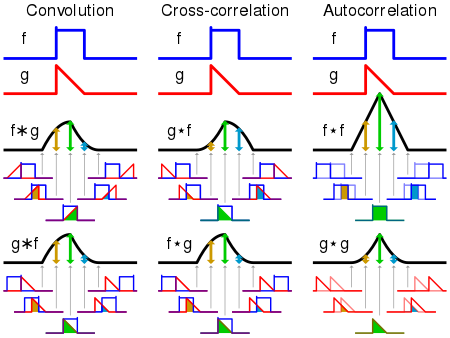
</div>

### Cross-correlation in continue time
Given two functions ${X_a(t)}$ and ${X_b(t)}$, then the cross-correlation can be defined as follows.

\begin{equation}
R_{{X_a}{X_b}}(t)=\int_{-\infty}^{\infty} {X_a}(t+\tau) \cdot {X_b}(\tau)  d\tau   
 = \int_{-\infty}^{\infty}  {X_a}(\tau)\cdot {X_b}(\tau - t) d\tau. \tag{1}
\end{equation} 

or
\begin{equation}
R_{{X_a}{X_b}}(t) =  {X_a}(t) \otimes {X_b}(t) . \tag{2}  
\end{equation} 

where $H$ is the length sub one of ${X_a}(\tau)$, and $\otimes$ is the operator of cross-correlation.

### Cross-correlation in discrete time
Given two discrete singals (sequences) $X_a[n]$ and $X_b[n]$, then the cross-Correlation function can be defined as:

\begin{equation}
R_{{X_a}{X_b}}[n]=\sum_{k=-\infty}^{\infty}  {X_a}[n+k] \cdot {X_b}[k] 
=\sum_{k=-\infty}^{\infty}{X_a}[k] \cdot {X_b}[k-n]. \tag{3}
\end{equation} 

or 
\begin{equation}
R_{{X_a}{X_b}}[n] = {X_a}[n] \otimes {X_b}[n]. \tag{4}
\end{equation} 

## <font color='green'> A simple example</font>
If a discrete signal is as follows: <br>
${X_a}=\{ 1,2,4,3,2,1,1 \}, n=0, 1,...,6$ <br>
and another discrete signal is <br>
${X_b}=\{ 1,2,3,1,1\}, n=0,1,2,3,4$ <br>
Please find the cross-correlation of the two signals.
<div>
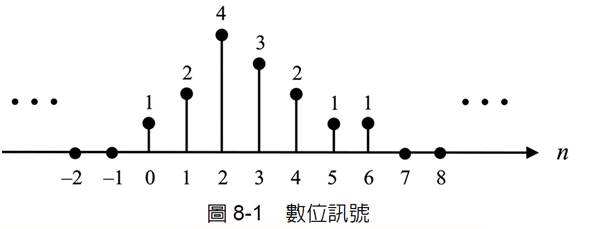
</div>
<div>
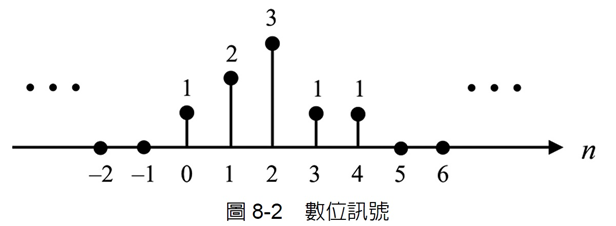
</div>

\begin{equation}
\begin{split}
R_{{X_a}{X_b}}[-4] &=\sum\limits_{k=-\infty}^{\infty} {X_a}[k]\cdot {X_b}[k+4] \\
     &= {X_a}[0] \cdot {X_b}[4] = 1 
\end{split}
\end{equation} 

\begin{equation}
\begin{split}
R_{{X_a}{X_b}}[-3] &=\sum\limits_{k=-\infty}^{\infty} {X_a}[k] \cdot {X_b}[k+3] \\
     &= {X_a}[0] \cdot {X_b}[3] + {X_a}[1] \cdot {X_b}[4] = 1 \cdot 1 + 2 \cdot 1 = 3 
\end{split}
\end{equation} 

\begin{equation}
\begin{split}
R_{{X_a}{X_b}}[-2] &=\sum\limits_{k=-\infty}^{\infty} {X_a}[k] \cdot {X_b}[k+2] \\
     &= {X_a}[0] \cdot {X_b}[2] + {X_a}[1] \cdot {X_b}[3] + {X_a}[2] \cdot {X_b}[4] = 3  + 2 + 4 = 9 
\end{split}
\end{equation} 

In [1]:
import numpy as np

xa = np.array( [ 1, 2, 4, 3, 2, 1, 1 ] )
xb = np.array( [ 1, 2, 3, 1, 1 ] )
r = np.correlate( xa, xb, 'full' )
r1 = np.correlate( xa, xb, 'same' )

print(f"xa = {xa}")
print(f"xb = {xb}")
print(f"Full Correlation of xa and xb is {r}")
print(f"Same Correlation of xa and xb is {r1}")

xa = [1 2 4 3 2 1 1]
xb = [1 2 3 1 1]
Full Correlation of xa and xb is [ 1  3  9 15 22 22 18 11  7  3  1]
Same Correlation of xa and xb is [ 9 15 22 22 18 11  7]


## <font color='green'>A Time delay example</font>
A time delay for measuing a distance from the correlation between sending and receiving signals.

In [2]:
import numpy as np
from scipy import signal

xa  = np.array( [5, 2, 4, 3, 2, 1, 6, 0, 0, 0, 0, 0 ] )
xb = np.array( [0, 5, 2, 4, 3, 2, 1, 6, 0, 0, 0, 0 ] )
xc = np.array( [0, 0, 5, 2, 4, 3, 2, 1, 6, 0, 0, 0 ] )

print(f"Correlation xa and xa = {np.correlate( xa, xa, 'full' )}")
print(f"Correlation xa and xb = {np.correlate( xa, xb, 'full' )}")
print(f"Correlation xa and xc = {np.correlate( xa, xc, 'full' )}")

Correlation xa and xa = [ 0  0  0  0  0 30 17 36 41 49 44 95 44 49 41 36 17 30  0  0  0  0  0]
Correlation xa and xb = [ 0  0  0  0 30 17 36 41 49 44 95 44 49 41 36 17 30  0  0  0  0  0  0]
Correlation xa and xc = [ 0  0  0 30 17 36 41 49 44 95 44 49 41 36 17 30  0  0  0  0  0  0  0]


In [3]:
x = xa; y =xc
correlation = signal.correlate(x, y, mode="full")
lags = signal.correlation_lags(x.size, y.size, mode="full")
lag = lags[np.argmax(correlation)]
print(f'The lag of x and y is {lag}')
# Question: what is the time delay?

The lag of x and y is -2


<hr style="border:2px solid green">

### <font color='blue'>8-2 Autocorrelation in continue time </font>
自相關函數 (ACF): 延遲為 $\tau$ 時，這是相距 $\tau$ 個時間間隔的數列值之間的相關性。
Given a function $x(t)$, then the autocorrelation can be defined as:

\begin{equation}
R_{xx}(\tau)=\int_{-\infty}^{\infty} x(t) \cdot x(t- \tau)dt. \tag{5}      
\end{equation}  

where $\tau$ is called lag (延遲).

### Autocorrelation in discrete time
Given a function $𝑥[n]$, then the autocorrelation can be defined as:

\begin{equation}
R_{xx}[\tau]=\sum_{k=-\infty}^{\infty} x[k] \cdot x[k - \tau]. \tag{6}     
\end{equation}  

where $\tau$ is lag.

<div>
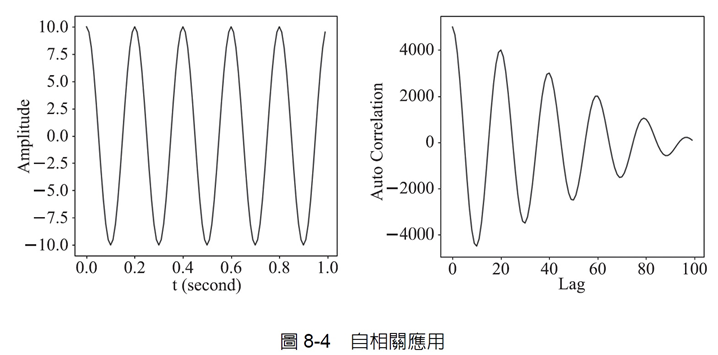
</div>
<div>
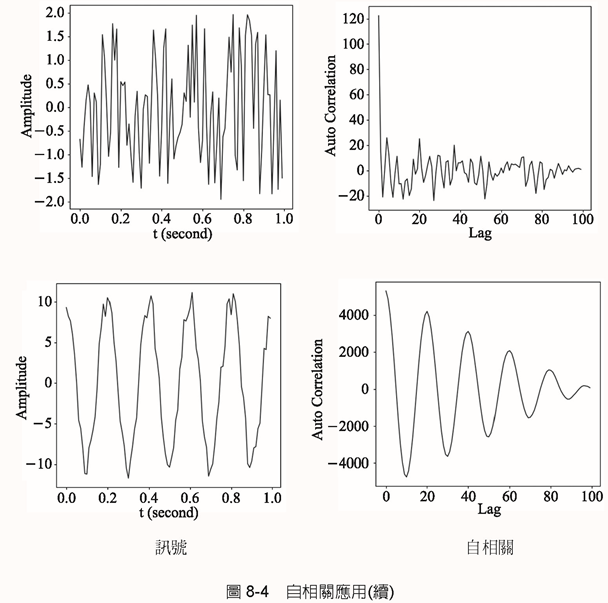
</div>

### Example: 
If a discete signal is $x[n]=\{1,2,1,2,1\}, n=0,1,...,4$, please find the auocorrelation of this signal.

\begin{equation}
\begin{split}
R_{xx}[0] &=\sum\limits_{k=-\infty}^{\infty} x[k] \cdot x[k] 
     &= x[0] \cdot x[0] + x[1] \cdot x[1] + x[2] \cdot x[2] + x[3] \cdot x[3] + x[4] \cdot x[4] = 11
\end{split}
\end{equation} 

\begin{equation}
\begin{split}
R_{xx}[1] &=\sum\limits_{k=-\infty}^{\infty} x[k] \cdot x[k-1] \\
     &= x[1] \cdot x[0] + x[2] \cdot x[1] + x[3] \cdot x[2] + x[4] \cdot x[3] = 2 + 2 + 2 + 2 =8
\end{split}
\end{equation} 

\begin{equation}
\begin{split}
R_{xx}[2] &=\sum\limits_{k=-\infty}^{\infty} x[k] \cdot x[k-2] \\
     &= x[2] \cdot x[0] + x[3] \cdot x[1] + x[4] \cdot x[2] = 1 + 4 + 1 = 6
\end{split}
\end{equation} 

#### Autocorrelation Function (ACF)

* Autocorrelation is the correlation between a time series with a lagged version of itself. The ACF starts at a lag of 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

|  Lag| Correlation Value | 
|----------|----|
|0	|corr($X[k], X[k]$)= 1|
|1	|corr($X[k+1], X[k]$) |
|2	|corr($X[k+2], X[k+1]$)  |
|3	|corr($X[k+3], X[k+2]$) |
|4	|corr($X[k+4], X[k+3]$) |

* The ACF plot can provide answers to the following questions:

    * Is the observed time series white noise/random?
    * Is an observation related to an adjacent observation, an observation twice-removed, and so on?
    * Can the observed time series be modeled with an MA model? If yes, what is the order?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [5]:
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

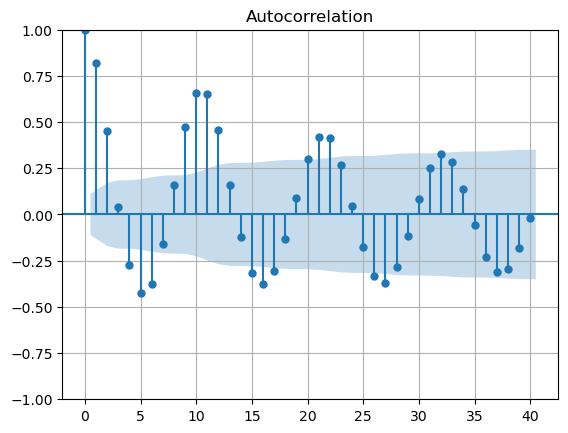

In [6]:
sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40)
plt.grid();plt.show()

#### Partial Autocorrelation Function (PACF)

* The partial autocorrelation at lag $\tau$ is the autocorrelation between $X_t$ and $X_{t-\tau}$ that is not accounted for by lags 1 through $\tau−1$.

The PACF for $\tau =1 $, as follows.
\begin{equation}
\alpha (1) = corr(X[k+1],X[k])
\end{equation}

Given that $\tau≥2$, we can use the following formula.
\begin{equation}
\alpha(\tau) = corr(X[k-\tau]− P_{k,\tau}(X[k+\tau]), X[k]− P_{k,\tau}k(X[k]))
\end{equation}

Given that $P_{k, \tau}(X)$ is the surjective operator of the orthogonal projection of $X$
 onto the linear subspace of Hilbert space spanned by $X[k+1],...,X[k+\tau]$.

The value for PACF for each lag is as follows.

|  Lag| Correlation Value of PACF | 
|----------|----|
|0	|$\alpha(0)$=1|
|1	|$\alpha(1)$|
|2	|$\alpha(2)$|
|3	|$\alpha(3)$|
|4	|$\alpha(4)$|

* The PACF plot can provide answers to the following question:

    * Can the observed time series be modeled with an AR model? If yes, what is the order?

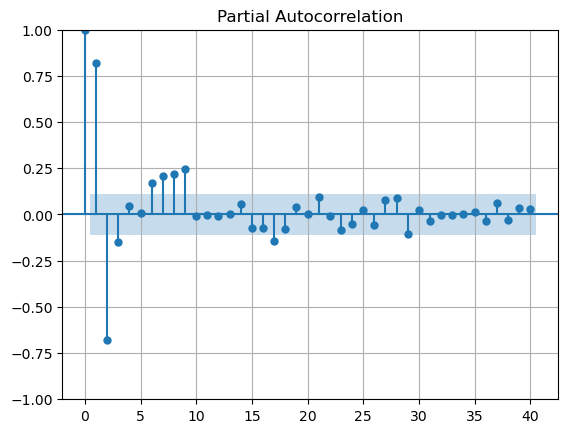

In [7]:
sm.graphics.tsa.plot_pacf(dta.values.squeeze(), lags=40, method="ywm")
plt.grid();plt.show()

<hr style="border:2px solid green">

### <font color='green'> Show the pattern of signals</font>

In [8]:
import numpy as np
import pandas as pd

def autocorr( x ):
	R = np.correlate( x, x, 'full' )
	return R[ int( R.size / 2 ) : ]

def main( ):
    x0 = np.array( [ 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0] )
    x1 = np.array( [ 1, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0] )
    x2 = np.array( [ 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2] )

    print(f"Autocorrelation of x0 = {autocorr( x0 )}")   
    print(f"Autocorrelation of x1 = {autocorr( x1 )}")
    print(f"Autocorrelation of x2 = {autocorr( x2 )}")
    
main( )

# Q1: Can we find the pattern from autocorrelation?
# Q2: Is the data length affect an autocorrelation value?

Autocorrelation of x0 = [11  8  6  4  1  0  0  0  0  0  0]
Autocorrelation of x1 = [10  4  0  0  2  5  2  0  0  0  0]
Autocorrelation of x2 = [20  8  6 15  6  4 10  4  2  5  2]


In [9]:
# ACF:自我相關係數， 該變數與落後期的相關係數
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

def autocorr( x ):
	R = np.correlate( x, x, 'full' )
	return R[ int( R.size / 2 ) : ]

def findlag(x,y):
    correlation = signal.correlate(x, y, mode="full")
    lags = signal.correlation_lags(x.size, y.size, mode="full")
    lag = lags[np.argmax(correlation)]
    print(f'The lag of x and y is {lag}')

ACF of x2 is [ 1.  -0.5 -0.4  0.8 -0.4 -0.3  0.6 -0.3 -0.2  0.4 -0.2 -0.1]
Lag of ACF 3


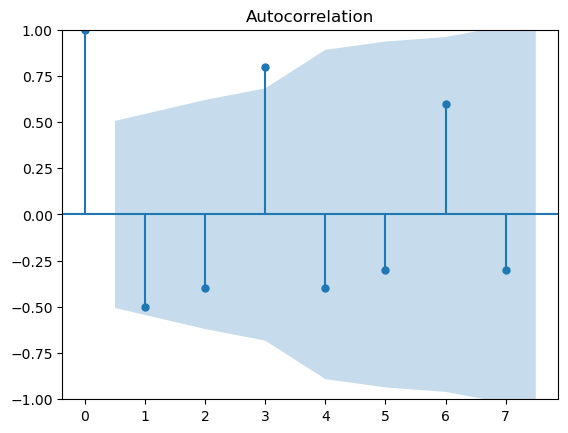

In [10]:
def main( ):
    x0 = np.array( [ 1, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0] )
    x1 = np.array( [ 1, 2, 0, 0, 0, 1, 2, 0, 0, 0,  1, 2, 0, 0, 0, 1, 2, 0, 0, 0 ])
    x2 = np.array( [ 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,0, 1, 2,0] )
    plot_acf(x2, alpha=0.05)
    
    print(f'ACF of x2 is {acf(x2)}') #自我相關
    print(f'Lag of ACF {np.argmax(acf(x2)[1:])+1}') # exclude first element
    
main( )

### <font color='green'> Advanced </font> 
#### Detection of Periodic Signals in the Presence of Noise
- The noise signal is an unwanted signal which has random amplitude variation. 
- The noise signals are uncorrelated with any periodic signal.
- Detection of the periodic signals masked by noise signals is of great importance in signal processing. 
- It is mainly used in the detection of radar and sonar signals, the detection of periodic components in brain signals, in the detection of periodic components in sea wave analysis and in many other areas of geophysics etc. The solution of these problems can be easily provided by thecorrelation techniques. The cross-correlation function, therefore can be used to detect a periodic signal which masked by a noise signal. <br>

Consider $x(t)$ is a periodic signal and $n(t)$ is the noise signal. <br>
Then, the cross-correlation function of the signals $x(t)$ and $n(t)$ is given by,

#### Detection of Periodic Signal by Cross Correlation
The cross-correlation can be used to detect a periodic signal which is mixed with another periodic signal of the same frequency. The disadvantage of the detection by cross-correlation is that it is necessary to know beforehand the frequency of the signal to be detected.
Now, consider the periodic signal x(t)is mixed with a noise signal n(t), then the received signal is given by,
\begin{equation}
\begin{split}
y(t) = x(t) + n(t) 
\end{split}. \tag{8}
\end{equation} 

\begin{equation}
\begin{split}
R_{xn}(\tau) &=\lim_{T \to \infty} \int_{-\frac{T}{2}}^{\frac{T}{2}} {x(t) \cdot n(t-\tau)dt}, \quad (\text {for all} \tau) \\ 
          &=0
\end{split}. \tag{7}
\end{equation}  

Also, consider $z(t)$ is a locally generated signal of the same frequency as that of the periodic signal $x(t)$. 
Therefore, the cross correlation function of $y(t)$ and $z(t)$ is given by,
\begin{equation}
\begin{split}
R_{yz}(\tau) &= \lim_{T \to \infty} \int_{-\frac{T}{2}}^{\frac{T}{2}} {y(t) \cdot z(t-\tau)dt} \\ 
             &= \lim_{T \to \infty} \int_{-\frac{T}{2}}^{\frac{T}{2}} {[x(t) + n(t)] \cdot z(t-\tau)dt} \\
             &= \lim_{T \to \infty} \int_{-\frac{T}{2}}^{\frac{T}{2}} {x(t) \cdot z(t-\tau)dt}
             + \lim_{T \to \infty} \int_{-\frac{T}{2}}^{\frac{T}{2}} {n(t) \cdot z(t-\tau)dt}\\
             &= R_{xz}(\tau) + R_{nz}(\tau)
\end{split}. \tag{9}
\end{equation} 

As the function $z(t)$ is a periodic function and it is uncorrelated with the noise signal $n(t)$. 
Thus, their cross-correlation function is equal to zero, i.e.,
\begin{equation}
R_{zn}(\tau) = 0. \tag{10}
\end{equation}

\begin{equation}
\therefore R_{yz}(\tau) =  R_{xz}(\tau). \tag{11}
\end{equation}

Here, the signals $x(t)$ and $z(t)$ are signals of the same frequency. 
Therefore, the correlation function $R_{xz}(\tau)$ is also a periodic function of the same frequency. <br> 
Hence, if the cross-correlation of the mixed signal $y(t)$ with $z(t)$ results a periodic signal, <br>
then the signal $y(t)$ must contain a periodic component of the same frequency as that of the signal $z(t)$. 
In this way, we can detect a periodic signal in the presence of noise using cross-correlation.

### <font color='blue'>8-3 ARIMA (p,d,q)</font>
* 模型的參數定義如下：

    * p: The number of lag observations included in the model, also called the lag order. AR(自回歸)項的階數。需要事先設定好，表示y的當前值和前p個歷史值有關。
    * d: The number of times that the raw observations are differenced, also called the degree of differencing. 使序列平穩的最小差分階數，一般是1階。非平穩序列可以通過差分來得到平穩序列，但是過度的差分，會導致時間序列失去自相關性，從而失去使用AR項的條件。
    * q: The size of the moving average window, also called the order of moving average. MA(滑動平均)項的階數。需要事先設定好，表示y的當前值和前q個歷史值AR預測誤差有關。實際是用歷史值上的AR項預測誤差來建立一個類似歸回的模型。

Autoregression AR(p):
\begin{equation}
\begin{split}
y_t = \mu + \sum_{i=1}^p \gamma_i y_{t-i} + \epsilon_t
\end{split}. \tag{12}
\end{equation} 
where $y_t$ is current value, $\mu$ is a constant value, $p$ is order, $\gamma_i$ is AR coef., and $\epsilon_t$ is error.

Moving Average MA(q):
\begin{equation}
\begin{split}
y_t = \mu + \epsilon_t + \sum_{i=1}^q \theta_i \epsilon_{t-i}  
\end{split}.\tag{13}
\end{equation} 
where $q$ is an order, $\theta_i$ is MA coef., and $\epsilon_t$ is error.

ARIMA(p, d, q):
\begin{equation}
\begin{split}
y_t = \mu + \sum_{i=1}^p \gamma_i y_{t-i}  + \epsilon_t + \sum_{i=1}^q \theta_i \epsilon_{t-i}  
\end{split}.\tag{14}
\end{equation} 

<div>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/1*BFZhxMlJLw_UgFGUVzadRA.png" width="600"/>
</div>

#### Steps for finding parameters of ARIMA(p,d,q) from a stationary time series
<div>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*Tq8i7fEfvpnydlLu.png" width="800"/>
</div>

#### Steps for finding parameters of ARIMA(p,d,q) from a non-stationary time series
<div>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*gkND2XkaIOVmAXSH.png" width="800"/>
</div>

* 選擇順序 d -> q -> p

    * ACF
    * PACF
    * Auto ARIMA（更現代的方法自動參數選擇）

In [11]:
import pandas as pd 
import datetime
from matplotlib import pyplot
import pandas as pd
from pmdarima.arima import ndiffs

            Sales of shampoo over a three year period
Month                                                
2001-01-01                                      266.0
2001-02-01                                      145.9
2001-03-01                                      183.1
2001-04-01                                      119.3
2001-05-01                                      180.3


C:\Users\hao\AppData\Local\Temp\ipykernel_7788\969453876.py:7: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('./datasets\\sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)


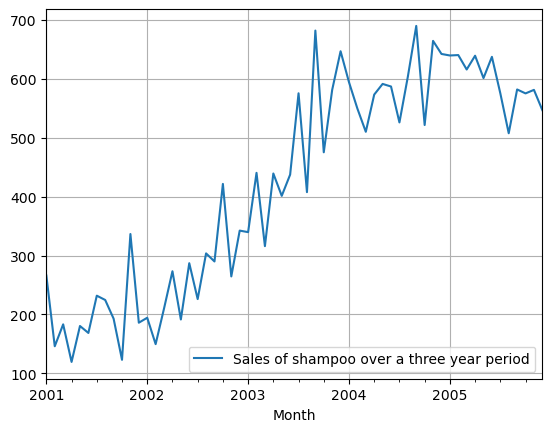

In [12]:
# In[1]: load data
def parser(x):
    return datetime.datetime.strptime(x, '%Y-%m')

def parser(x):
    return datetime.datetime.strptime(x, '%Y-%m')
df = pd.read_csv('./datasets\\sales.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

print(df.head())
df.plot()
plt.grid()
#plt.rcParams["figure.figsize"] = (20,5)
pyplot.show()

In [13]:
# 算出推薦的差分次數
d =  ndiffs(df["Sales of shampoo over a three year period"],  test="adf")
print(d) # 1

1


* AR階數p
    * AR的階數p可以通過pacf圖來設定，因為AR各項的係數就代表了各項自變量x對因變量y的偏自相關性。

    * 可以看到，lag1，lag2之後，偏自相關落入了藍色背景區間內，表示不相關，所以這裏階數可以選擇2，或者保守點選擇1。

* MA階數q
    * MA階數通過acf圖來設定，因為MA是預測誤差，預測誤差是自回歸預測和真實值之間的偏差。定階過程類似AR階數的設定過程。這裏可以選擇3，或者保守點選擇2。

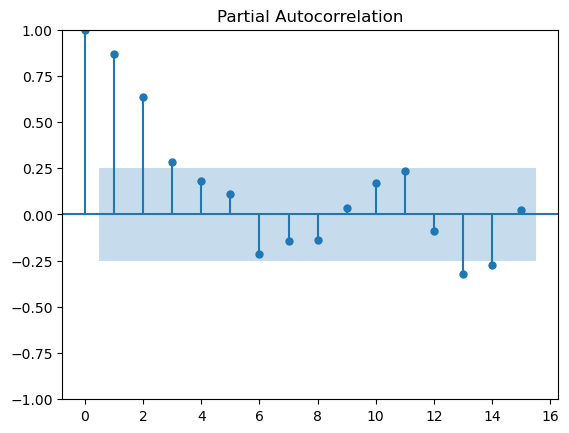

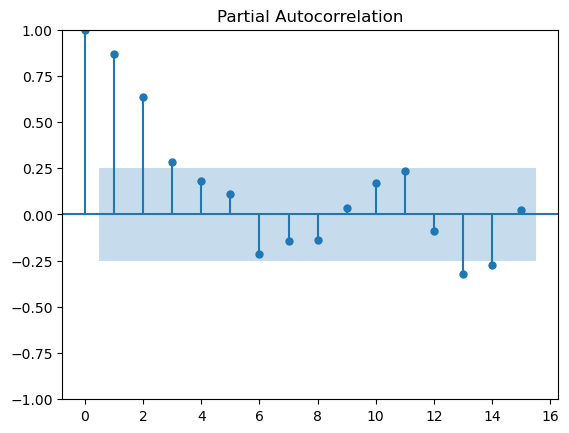

In [14]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df, lags = 15, method = "ols")

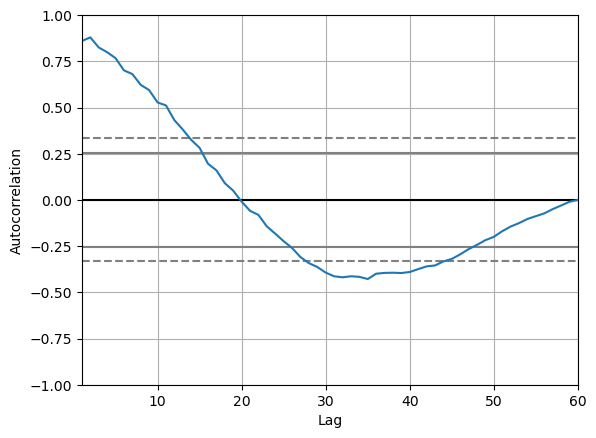

In [15]:
# In[2]: positive correlation with the first 10-to-12 lags, significant for the first 5 lags.
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
pyplot.show()
# A good starting point for the AR parameter of the model may be 5.

In [16]:
# In[3]
from pandas import DataFrame
import statsmodels.api as sm

# fit model: ARIMA (p,d,q): numbers of AR terms, nonseasonal differences, MA terms
# This sets the lag value to 5 for autoregression, 
# uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

model = sm.tsa.arima.ARIMA(df, order=(4,1,0))
model_fit = model.fit()

print(model_fit.summary())

                                           SARIMAX Results                                           
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   60
Model:                                        ARIMA(4, 1, 0)   Log Likelihood                -330.834
Date:                                       Thu, 17 Oct 2024   AIC                            671.669
Time:                                               08:26:23   BIC                            682.056
Sample:                                           01-01-2001   HQIC                           675.723
                                                - 12-01-2005                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8958     

c:\Users\hao\anaconda3\envs\Python11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hao\anaconda3\envs\Python11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\hao\anaconda3\envs\Python11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


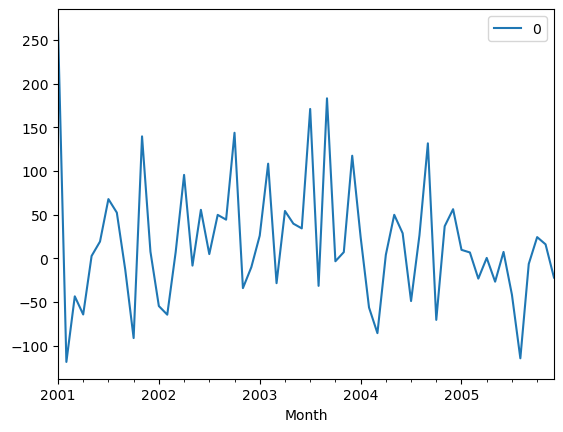

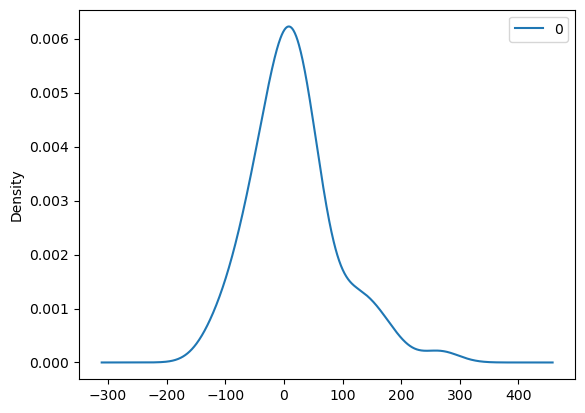

                0
count   60.000000
mean    17.642230
std     72.748795
min   -118.565556
25%    -27.148576
50%      7.214737
75%     49.754245
max    266.000000


In [17]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
#a line plot of the residual errors, 
#suggesting that there may still be some trend information not captured by the model.
pyplot.show()

residuals.plot(kind='kde') 
# a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero.
pyplot.show()
print(residuals.describe())

predicted=606.161232, expected=573.300000
predicted=535.071609, expected=591.400000
predicted=536.422068, expected=587.000000
predicted=564.175589, expected=526.000000
predicted=578.553158, expected=603.600000


C:\Users\hao\AppData\Local\Temp\ipykernel_7788\2121690155.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('predicted=%f, expected=%f' % (yhat, obs))


predicted=574.160995, expected=689.900000
predicted=602.068833, expected=521.600000
predicted=621.244149, expected=664.500000
predicted=586.372734, expected=642.300000
predicted=662.470518, expected=639.700000
predicted=629.109445, expected=640.400000
predicted=627.486740, expected=615.900000
predicted=673.950874, expected=639.300000
predicted=620.224136, expected=601.300000
predicted=627.775130, expected=637.400000
predicted=611.982807, expected=575.500000
predicted=618.951883, expected=507.600000
predicted=586.033479, expected=582.000000
predicted=537.726700, expected=575.300000
predicted=553.396325, expected=581.300000
predicted=543.106885, expected=546.900000
Test MSE: 2483.248


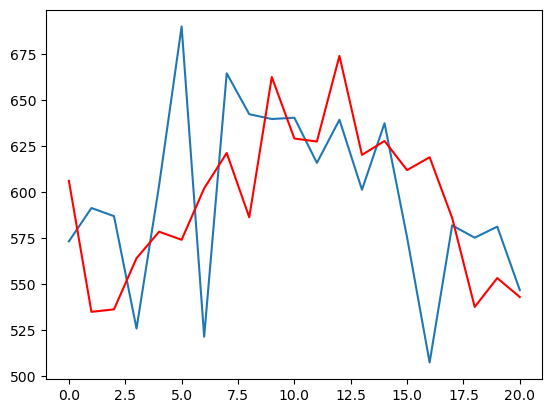

In [18]:
# In[4]
from sklearn.metrics import mean_squared_error

X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

<div>
<img src="https://miro.medium.com/v2/resize:fit:828/format:webp/0*SJjoULJfLlCng7_Y.png" width="900"/>
</div>

## <font color='red'> Final Problem:</font>


How to find the optimal model by automatic model selection based on either Bayesian Information Criterion (BIC) or Akaike information criterion (AIC)? 